In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace = True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)                                                      # one-hot encoding (gepgraphy,gender)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
X = df.drop(columns=['Exited'])
Y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
Y_train.shape

(8000,)

In [ ]:
Y_train.head()

,Exited
2694,0
5140,0
2568,1
3671,0
7427,0


In [ ]:
X_train.shape

(8000, 11)

In [ ]:
Y_test.shape

(2000,)

In [ ]:
Y_test.head()

,Exited
9953,0
3850,0
4962,0
3886,0
5437,0


In [ ]:
X_test.shape

(2000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [71]:
model = Sequential()

In [74]:
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [75]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model.compile(loss = 'binary_crossentropy',optimizer= 'Adam',metrics = ['accuracy'])

In [85]:
history = model.fit(X_train_scaled,Y_train, epochs = 50, validation_split = 0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8641 - loss: 0.3266 - val_accuracy: 0.8487 - val_loss: 0.3517
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8600 - loss: 0.3370 - val_accuracy: 0.8506 - val_loss: 0.3483
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8604 - loss: 0.3312 - val_accuracy: 0.8525 - val_loss: 0.3462
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8725 - loss: 0.3146 - val_accuracy: 0.8537 - val_loss: 0.3459
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8683 - loss: 0.3200 - val_accuracy: 0.8506 - val_loss: 0.3464
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8689 - loss: 0.3205 - val_accuracy: 0.8469 - val_loss: 0.3484
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8687 - loss: 0.3192 - val_accuracy: 0.8475 - val_loss: 0.3474
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8657 - loss: 0.3191 - val_accuracy: 0.

In [86]:
model.layers[0].get_weights()

[array([[ 0.04696345,  0.12518841,  0.0559209 , -0.37533185,  0.00540833,
          0.22264755,  0.04058206,  0.4523677 ,  0.06457227, -0.24370243,
          0.22221085],
        [-0.7486733 , -0.13141146, -0.80826783,  0.17983124,  0.01501522,
          0.0536947 ,  0.96818864, -0.51424205, -0.5355452 ,  0.08916164,
          0.10195397],
        [-0.08190309,  0.11039914,  0.06438649, -0.05351134, -0.03333097,
         -0.15078652,  0.3359025 ,  0.47650388, -0.12357146,  0.13922827,
         -0.00188377],
        [-0.013092  , -0.78677773,  0.20741373, -0.48350707, -0.32490087,
         -0.06907517, -0.16053922, -0.08033794, -0.35004908, -0.8203852 ,
          0.7055443 ],
        [ 0.02123942,  0.46739915,  0.00510293, -0.36247414, -1.1284927 ,
          0.29948595,  0.54919994, -0.2693405 , -0.18620148,  1.5310903 ,
          0.86606336],
        [ 0.08422669, -0.2160002 , -0.15294144, -0.34653226,  0.01840655,
          0.4267651 ,  0.19196182, -0.05488755,  0.20857358,  0.1101647

In [87]:
model.layers[1].get_weights()

[array([[ 0.04416575, -0.04746077,  0.4537607 ,  0.11092963,  0.20548809,
         -0.7325106 , -0.06922755, -1.2576497 , -0.11846862, -0.51963264,
          0.6842904 ],
        [-0.11238222, -0.12071154,  0.3202158 , -1.3472931 , -0.2523233 ,
          0.8877192 , -0.250623  , -0.53186756,  0.04356283,  0.3623296 ,
         -0.71689135],
        [ 0.43048504,  0.4803631 ,  0.12550166, -0.61996555, -0.2488962 ,
          0.38977945, -0.38838375, -0.85139936,  0.1910505 , -0.12664606,
          0.16034049],
        [ 0.14957431, -0.06499231,  0.5833735 , -0.5505612 ,  0.2907866 ,
         -0.30461642, -0.7594887 ,  0.17954688,  0.28210962,  0.46568862,
          0.00353673],
        [-0.35888   ,  0.23623559,  0.04285373,  0.400624  ,  0.04061429,
          0.22859967, -0.76942164,  0.8696341 ,  0.41974223,  0.64180666,
         -0.2625955 ],
        [ 0.47534952, -0.4928132 ,  0.06374609,  0.22545037,  0.4749994 ,
          0.28163588,  0.30191845,  0.14609835, -0.12890318,  0.2437806

In [88]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[0.02635077],
       [0.07216312],
       [0.06942134],
       ...,
       [0.0073437 ],
       [0.08807286],
       [0.37574   ]], dtype=float32)

In [89]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [90]:
y_pred=np.where(y_log>0.5,1,0)

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.867

In [92]:
import matplotlib.pyplot as plt


In [93]:
history.history

{'accuracy': [0.8670312762260437,
  0.8668749928474426,
  0.8659374713897705,
  0.8665624856948853,
  0.8646875023841858,
  0.8667187690734863,
  0.866406261920929,
  0.8659374713897705,
  0.8665624856948853,
  0.8656250238418579,
  0.8653125166893005,
  0.8665624856948853,
  0.8673437237739563,
  0.8659374713897705,
  0.866406261920929,
  0.8684375286102295,
  0.8675000071525574,
  0.8662499785423279,
  0.8657812476158142,
  0.867968738079071,
  0.8667187690734863,
  0.8662499785423279,
  0.8657812476158142,
  0.8662499785423279,
  0.8668749928474426,
  0.8678125143051147,
  0.8675000071525574,
  0.8687499761581421,
  0.8687499761581421,
  0.867968738079071,
  0.8659374713897705,
  0.8668749928474426,
  0.8678125143051147,
  0.8684375286102295,
  0.8671875,
  0.8671875,
  0.8685937523841858,
  0.8692187666893005,
  0.8685937523841858,
  0.8682812452316284,
  0.8671875,
  0.8673437237739563,
  0.8675000071525574,
  0.8668749928474426,
  0.8684375286102295,
  0.8682812452316284,
  0.868

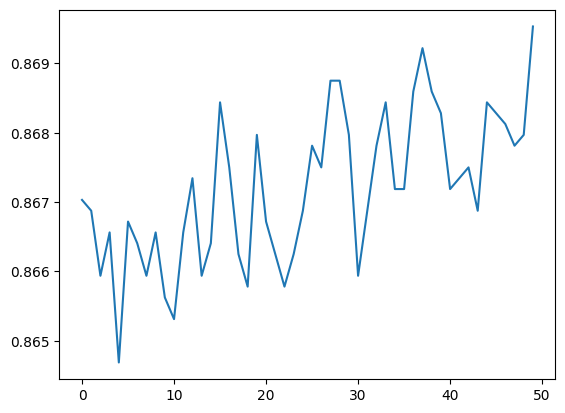

In [97]:
plt.plot(history.history['accuracy'])

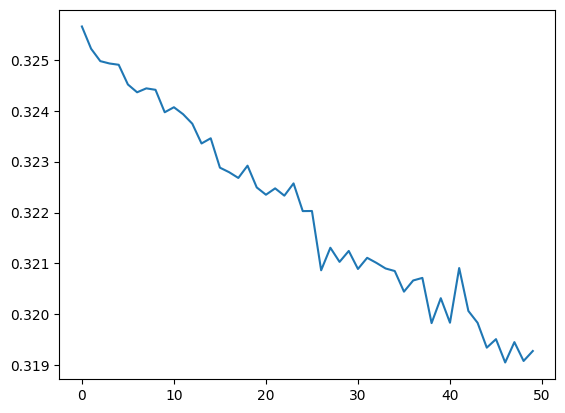

In [96]:
plt.plot(history.history['loss'])